# Perceptrón Multicapa (MLP)
- Objetivo: Conocer el Perceptrón Multicapa y su implementación en Keras Tensorflow 2

## Características de un MLP
- Un perceptrón multicapa aprende los valores de los parámetros que mejor minimizan alguna función de error. Esto se consigue derivando respecto a los pesos, y actualizando los valores tomando en cuenta el parámetro 'learning rate'
- Cada MLP consiste en una capa de entrada, capas ocultas, y una capa de salida, en la capa de salida cambia la función de activación dependiendo de la tarea
- Un perceptrón aproxima una función
- La red aprende de forma iterativa los parámetros. Para problemas de clasificación, el número de neuronas de salida es igual a el número de clases


![Perceptron Multicapa](img/1.png)

- Las redes a construir para el dataset cuentan en la capa de entrada y oculta con varias neuronas, y una sola neurona en la capa de salida


In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()

x_data = data.data
y_data = data.target
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.33, random_state = 2) 

## Conjunto de datos Breast Cáncer
- Comparar el desempeño de MLP con los clasificadores tradicionales

In [2]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 30)
(188, 30)
(381,)
(188,)


In [3]:
epoch = 50
verbose = 0
batch = 50

## Importar tensorflow y keras


In [4]:
import tensorflow as tf
from tensorflow import keras

## Agregar capas y número de neuronas

- Las capas se añaden con 'keras.layers' indicando el número de neuronas
- La funcíón sigmoide utiliza 'binary_crossentropy' y una neurona de salida
- Se prueba con varios modelos de diferentes capas y neuronas

In [5]:
model1 = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30, ), activation = 'sigmoid'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [6]:
model2 = keras.Sequential([
    keras.layers.Dense(50, input_shape=(30, ), activation = 'sigmoid'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [7]:
model3 = keras.Sequential([
    keras.layers.Dense(30, input_shape=(30, ), activation = 'sigmoid'),
    keras.layers.Dense(30, activation = 'sigmoid'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

## Compilar modelo
- La función de costo y el optimizador se asignan en 'compile' antes del entrenamiento. Aquí el optimizador es 'rmsprop'


In [8]:
model1.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model3.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Visualizar modelos
- Se importa 'plot_model'

In [9]:
from tensorflow.keras.utils import plot_model

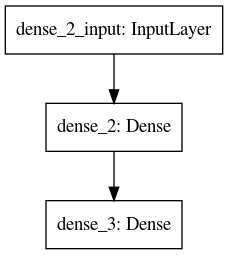

In [11]:
plot_model(model2)

In [12]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


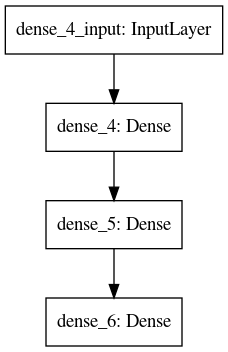

In [13]:
plot_model(model3)

## Visualizar información del modelo
- Comparar los modelos por número de parámetros

In [14]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                930       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 31        
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


In [15]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                1550      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 1,601
Trainable params: 1,601
Non-trainable params: 0
_________________________________________________________________


In [16]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                930       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 31        
Total params: 1,891
Trainable params: 1,891
Non-trainable params: 0
_________________________________________________________________


## Entrenamiento
- El modelo se entrena con el método 'fit' asignando número de épocas y tamaño de batch
- El número de épocas indica la cantidad de ciclos de entrenamiento sobre todos los elementos del dataset

In [17]:
history1 = model1.fit(x_train, y_train, validation_split=0.33, batch_size = batch, 
                    epochs = epoch, verbose = 1)

Train on 255 samples, validate on 126 samples
Epoch 1/50
255/255 [==============================] - 1s 4ms/sample - loss: 0.8334 - accuracy: 0.3608 - val_loss: 0.7166 - val_accuracy: 0.3730
Epoch 2/50
255/255 [==============================] - 0s 154us/sample - loss: 0.6917 - accuracy: 0.3608 - val_loss: 0.6851 - val_accuracy: 0.3730
Epoch 3/50
255/255 [==============================] - 0s 156us/sample - loss: 0.6655 - accuracy: 0.3725 - val_loss: 0.6561 - val_accuracy: 0.8016
Epoch 4/50
255/255 [==============================] - 0s 133us/sample - loss: 0.6448 - accuracy: 0.8745 - val_loss: 0.6516 - val_accuracy: 0.7778
Epoch 5/50
255/255 [==============================] - 0s 131us/sample - loss: 0.6328 - accuracy: 0.8902 - val_loss: 0.6307 - val_accuracy: 0.9206
Epoch 6/50
255/255 [==============================] - 0s 158us/sample - loss: 0.6110 - accuracy: 0.8667 - val_loss: 0.6006 - val_accuracy: 0.7619
Epoch 7/50
255/255 [==============================] - 0s 159us/sample - loss: 0.

In [18]:
history2 = model2.fit(x_train, y_train, validation_split=0.33, batch_size = batch, 
                    epochs = epoch, verbose = 1)

Train on 255 samples, validate on 126 samples
Epoch 1/50
255/255 [==============================] - 1s 2ms/sample - loss: 0.6487 - accuracy: 0.6392 - val_loss: 0.6035 - val_accuracy: 0.6270
Epoch 2/50
255/255 [==============================] - 0s 175us/sample - loss: 0.5902 - accuracy: 0.6392 - val_loss: 0.5927 - val_accuracy: 0.6349
Epoch 3/50
255/255 [==============================] - 0s 183us/sample - loss: 0.5687 - accuracy: 0.6588 - val_loss: 0.5614 - val_accuracy: 0.6349
Epoch 4/50
255/255 [==============================] - 0s 184us/sample - loss: 0.5500 - accuracy: 0.6431 - val_loss: 0.5490 - val_accuracy: 0.7222
Epoch 5/50
255/255 [==============================] - 0s 166us/sample - loss: 0.5442 - accuracy: 0.6863 - val_loss: 0.5442 - val_accuracy: 0.6984
Epoch 6/50
255/255 [==============================] - 0s 157us/sample - loss: 0.5397 - accuracy: 0.6549 - val_loss: 0.5360 - val_accuracy: 0.7063
Epoch 7/50
255/255 [==============================] - 0s 134us/sample - loss: 0.

In [19]:
history3 = model3.fit(x_train, y_train, validation_split=0.33, batch_size = batch, 
                    epochs = epoch, verbose = 1)

Train on 255 samples, validate on 126 samples
Epoch 1/50
255/255 [==============================] - 1s 2ms/sample - loss: 1.1683 - accuracy: 0.3608 - val_loss: 1.0283 - val_accuracy: 0.3730
Epoch 2/50
255/255 [==============================] - 0s 162us/sample - loss: 1.0078 - accuracy: 0.3608 - val_loss: 0.9281 - val_accuracy: 0.3730
Epoch 3/50
255/255 [==============================] - 0s 138us/sample - loss: 0.9162 - accuracy: 0.3608 - val_loss: 0.8544 - val_accuracy: 0.3730
Epoch 4/50
255/255 [==============================] - 0s 147us/sample - loss: 0.8459 - accuracy: 0.3608 - val_loss: 0.7988 - val_accuracy: 0.3730
Epoch 5/50
255/255 [==============================] - 0s 161us/sample - loss: 0.7918 - accuracy: 0.3608 - val_loss: 0.7565 - val_accuracy: 0.3730
Epoch 6/50
255/255 [==============================] - 0s 138us/sample - loss: 0.7496 - accuracy: 0.3608 - val_loss: 0.7198 - val_accuracy: 0.3730
Epoch 7/50
255/255 [==============================] - 0s 132us/sample - loss: 0.

## Evaluación
- El modelo se evalúa en un conjunto de prueba (test) no observado durante el entrenamiento con el método 'evaluate'. De esta forma se valida si el modelo aprendió a generalizar
- El método 'evaluate' regresa el 'costo' y 'accuracy' por lo que se crean dos variables para guardar los resultados

In [20]:
test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

188/1 - 0s - loss: 0.3904 - accuracy: 0.9096

Test accuracy: 0.90957445


In [21]:
test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

188/1 - 0s - loss: 0.3889 - accuracy: 0.8830

Test accuracy: 0.88297874


In [22]:
test_loss, test_acc = model3.evaluate(x_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

188/1 - 0s - loss: 0.5662 - accuracy: 0.6117

Test accuracy: 0.61170214


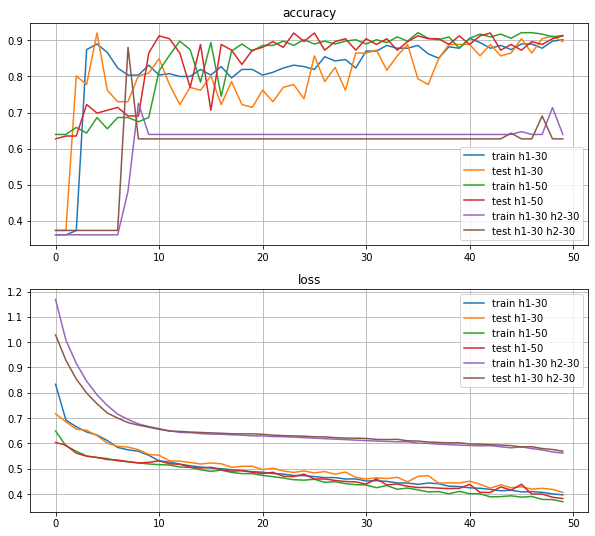

In [26]:
plt.figure(figsize=(10,9))

plt.subplot(211)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train h1-30', 'test h1-30',
            'train h1-50', 'test h1-50',
            'train h1-30 h2-30', 'test h1-30 h2-30'])
plt.grid()
plt.subplot(212)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('loss')
plt.legend(['train h1-30', 'test h1-30',
            'train h1-50', 'test h1-50',
            'train h1-30 h2-30', 'test h1-30 h2-30'])
plt.grid()

## Visualizar la clasificación 
- Visualizar la clasificación del modelo con mayor 'accuracy' en el conjunto de prueba

In [29]:
from sklearn.decomposition import PCA
import numpy as np
pca = PCA(n_components=2).fit(x_test)
y = y_test
X_pca = pca.transform(x_test)

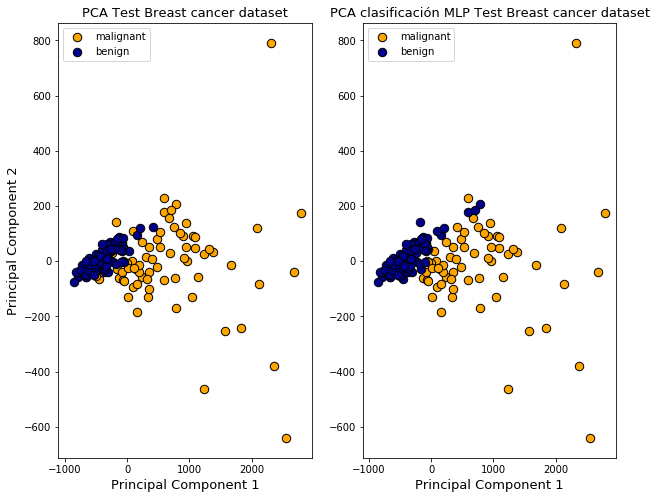

In [30]:
target_ids = np.unique(y)
plt.figure(figsize=(10,8))
colors = ['orange', 'darkblue']
target_names = ['malignant','benign']
plt.subplot(121)
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_pca[i == y,0], X_pca[i == y,1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.title('PCA Test Breast cancer dataset',fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)
plt.ylabel("Principal Component 2",fontsize=13)


plt.subplot(122)
y_prob = model1.predict(x_test) 
y  = (y_prob > 0.5).astype(np.int)
y = y[:,0] # solo una dimensión


for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_pca[i == y,0], X_pca[i == y,1], c = c,  edgecolors='black', s=285,label=label, marker='.')
plt.legend()
plt.title('PCA clasificación MLP Test Breast cancer dataset',fontsize=13)
plt.xlabel("Principal Component 1",fontsize=13)


plt.show()

- Experimentar con diferentes capas y número de neuronas
- Entrenar en menor tiempo y obtener mejor 'accuracy' modificando solo el número de capas y neuronas.
- Aplicar MLP a otro dataset